### Image classification with a pre-trained deep neural network
##### https://www.kernix.com/blog/image-classification-with-a-pre-trained-deep-neural-network_p11 


In [13]:
import os
import re
import sys
#import tensorflow as tf
#import tensorflow.python.platform
#from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import sklearn
from sklearn import cross_validation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [14]:
features = pd.read_csv('train_features/train_features.csv')
labels = pd.read_csv('train_features/train_labels.csv')

In [54]:
test_features = pd.read_csv('test_features/test_features.csv')
test_labels = pd.read_csv('test_features/test_labels.csv')

In [16]:
features.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0.191114,0.055288,0.151806,0.206818,0.161767,0.451935,0.168269,0.212578,0.139534,...,0.078050,0.283233,0.482348,0.932892,0.053240,0.309019,0.164913,0.495136,0.102728,0.099377
1,1,0.326803,0.151622,0.143396,0.206318,0.268735,0.268457,0.193025,0.486610,0.140846,...,0.351960,0.026065,1.073020,0.072437,0.297394,0.656356,0.950157,0.317864,0.652587,0.098432
2,2,0.255629,0.150071,0.197537,0.264433,0.340872,0.351698,0.312015,0.292101,0.226437,...,0.034137,0.160705,0.159797,0.363690,0.015106,0.398355,0.475460,0.345389,0.612602,0.207244
3,3,0.240947,0.790630,0.324902,0.437339,0.310772,0.154219,0.237601,0.342433,0.177803,...,0.596556,0.564830,0.495224,0.320772,0.238319,0.779326,0.936180,0.164909,0.736020,0.019916
4,4,0.051455,0.074275,0.139457,0.270888,0.159549,0.068245,0.256997,0.214552,0.073901,...,0.226299,0.240856,0.131127,0.070200,0.006564,0.659059,0.684263,0.275495,0.682989,0.363714


In [17]:
labels.head()

,Unnamed: 0,0
0,0,062.Herring_Gull
1,1,062.Herring_Gull
2,2,062.Herring_Gull
3,3,062.Herring_Gull
4,4,062.Herring_Gull


In [18]:
features = np.asarray(features.iloc[:,1:])
#labels = np.asarray(labels.iloc[:,0])
labels=np.asarray(labels.iloc[:,1])

In [19]:
features

array([[ 0.19111384,  0.05528811,  0.1518057 , ...,  0.49513641,
         0.10272799,  0.09937724],
       [ 0.32680315,  0.15162197,  0.14339609, ...,  0.31786421,
         0.65258718,  0.09843201],
       [ 0.25562873,  0.15007134,  0.19753662, ...,  0.34538913,
         0.61260188,  0.20724382],
       ..., 
       [ 0.15704125,  0.51193476,  0.40053442, ...,  0.41134512,
         0.2205793 ,  0.20769177],
       [ 0.33113375,  0.22959939,  0.26473802, ...,  0.34711501,
         0.33439025,  0.55776107],
       [ 0.04755317,  0.11848356,  0.27810761, ...,  0.21652335,
         0.22103448,  0.31896761]])

In [20]:
labels

array(['062.Herring_Gull', '062.Herring_Gull', '062.Herring_Gull', ...,
       '147.Least_Tern', '147.Least_Tern', '147.Least_Tern'], dtype=object)

In [21]:
labels

array(['062.Herring_Gull', '062.Herring_Gull', '062.Herring_Gull', ...,
       '147.Least_Tern', '147.Least_Tern', '147.Least_Tern'], dtype=object)

In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, labels, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(3456, 2048)

In [24]:
X_test.shape

(864, 2048)

In [25]:
y_train.shape

(3456,)

In [26]:
y_test.shape

(864,)

In [27]:
clf = LinearSVC(C=1.0, loss='squared_hinge', penalty='l2',multi_class='ovr')

In [28]:
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
def plot_confusion_matrix(y_true,y_pred):
    cm_array = confusion_matrix(y_true,y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

Accuracy: 69.6%


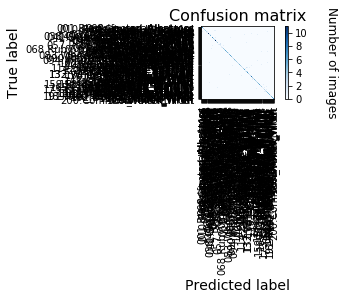

In [31]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))
plot_confusion_matrix(y_test,y_pred)

Accuracy: 69.6%


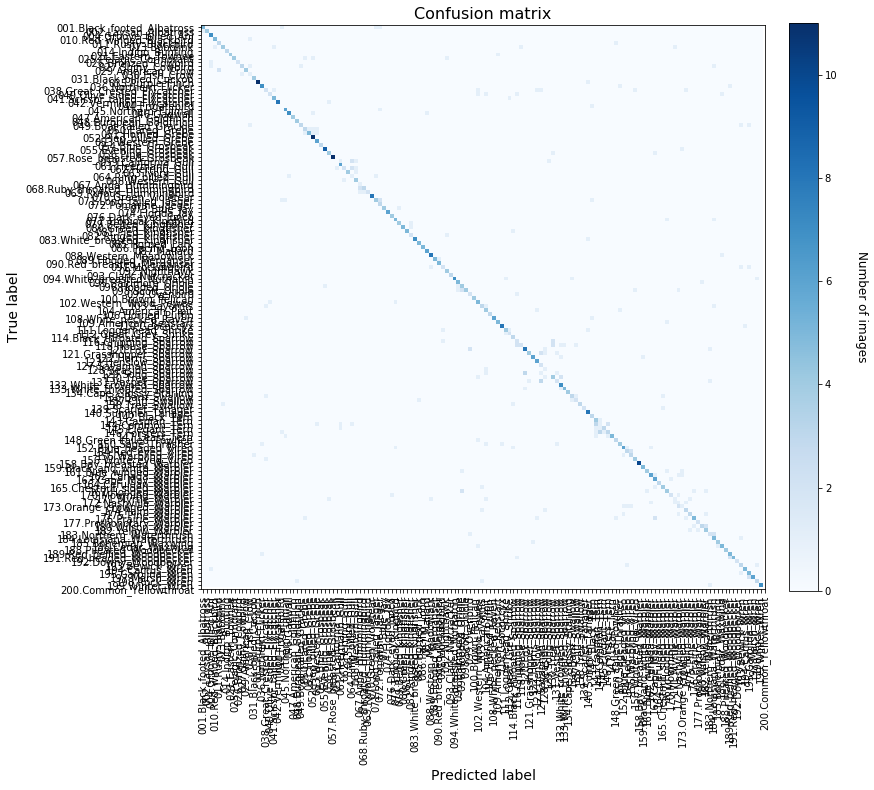

In [32]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))
plot_confusion_matrix(y_test,y_pred)

In [33]:
y_pred

array(['095.Baltimore_Oriole', '127.Savannah_Sparrow',
       '165.Chestnut_sided_Warbler', '140.Summer_Tanager',
       '052.Pied_billed_Grebe', '110.Geococcyx', '074.Florida_Jay',
       '108.White_necked_Raven', '041.Scissor_tailed_Flycatcher',
       '094.White_breasted_Nuthatch', '182.Yellow_Warbler', '103.Sayornis',
       '080.Green_Kingfisher', '103.Sayornis', '079.Belted_Kingfisher',
       '173.Orange_crowned_Warbler', '042.Vermilion_Flycatcher',
       '046.Gadwall', '144.Common_Tern', '152.Blue_headed_Vireo',
       '193.Bewick_Wren', '100.Brown_Pelican', '035.Purple_Finch',
       '066.Western_Gull', '090.Red_breasted_Merganser',
       '068.Ruby_throated_Hummingbird', '184.Louisiana_Waterthrush',
       '088.Western_Meadowlark', '127.Savannah_Sparrow',
       '088.Western_Meadowlark', '175.Pine_Warbler', '122.Harris_Sparrow',
       '109.American_Redstart', '053.Western_Grebe',
       '191.Red_headed_Woodpecker', '057.Rose_breasted_Grosbeak',
       '088.Western_Meadowlar

In [55]:
test_features = np.asarray(test_features.iloc[:,1:])
#labels = np.asarray(labels.iloc[:,0])
test_labels=np.asarray(test_labels.iloc[:,1])

In [35]:
ypro_pred = clf.predict(test_features)

In [36]:
ypro_pred

array(['029.American_Crow', '086.Pacific_Loon', '183.Northern_Waterthrush',
       ..., '052.Pied_billed_Grebe', '025.Pelagic_Cormorant',
       '106.Horned_Puffin'], dtype=object)

In [60]:
ypp =[ypro_pred[i].split('.')[0] for i in range (len(ypro_pred))]
ypp_0 = [ypp[i].lstrip('0') for i in range (len(ypp))]
ypp_0

['29',
 '86',
 '183',
 '49',
 '27',
 '152',
 '26',
 '145',
 '148',
 '145',
 '74',
 '68',
 '162',
 '49',
 '185',
 '31',
 '123',
 '72',
 '95',
 '171',
 '103',
 '200',
 '137',
 '156',
 '114',
 '42',
 '134',
 '194',
 '158',
 '183',
 '130',
 '27',
 '2',
 '89',
 '175',
 '76',
 '154',
 '59',
 '49',
 '130',
 '110',
 '139',
 '200',
 '122',
 '104',
 '61',
 '94',
 '36',
 '103',
 '173',
 '159',
 '73',
 '59',
 '139',
 '4',
 '197',
 '86',
 '46',
 '21',
 '50',
 '176',
 '99',
 '116',
 '82',
 '184',
 '108',
 '129',
 '122',
 '61',
 '109',
 '87',
 '76',
 '200',
 '85',
 '55',
 '99',
 '80',
 '99',
 '162',
 '38',
 '41',
 '128',
 '170',
 '81',
 '46',
 '36',
 '30',
 '175',
 '123',
 '144',
 '67',
 '172',
 '89',
 '184',
 '127',
 '109',
 '140',
 '38',
 '180',
 '134',
 '192',
 '137',
 '199',
 '74',
 '96',
 '41',
 '103',
 '77',
 '122',
 '69',
 '50',
 '25',
 '161',
 '167',
 '85',
 '74',
 '143',
 '56',
 '121',
 '51',
 '152',
 '106',
 '51',
 '132',
 '10',
 '41',
 '13',
 '49',
 '56',
 '143',
 '63',
 '148',
 '83',
 '76

In [37]:
type(ypro_pred)

numpy.ndarray

In [38]:
test_labels

array(['871.jpg', '1846.jpg', '796.jpg', ..., '4268.jpg', '1195.jpg',
       '2193.jpg'], dtype=object)

In [39]:
type(test_labels)

numpy.ndarray

In [40]:
test_labels.shape

(4320,)

In [56]:
tl =[test_labels[i].split('.')[0] for i in range (len(test_labels))]
tl

['871',
 '1846',
 '796',
 '2771',
 '2168',
 '2510',
 '716',
 '1938',
 '384',
 '2574',
 '377',
 '3190',
 '942',
 '220',
 '1970',
 '3637',
 '2690',
 '2115',
 '2102',
 '581',
 '3788',
 '2920',
 '2131',
 '3056',
 '2595',
 '1811',
 '1090',
 '1945',
 '4038',
 '4318',
 '2385',
 '2777',
 '1073',
 '1796',
 '4198',
 '85',
 '2606',
 '4010',
 '2232',
 '2149',
 '2957',
 '1288',
 '323',
 '2301',
 '3942',
 '3743',
 '3461',
 '1399',
 '417',
 '3367',
 '2039',
 '547',
 '3652',
 '1503',
 '1663',
 '2436',
 '2352',
 '177',
 '1395',
 '2084',
 '1962',
 '437',
 '2969',
 '2873',
 '1314',
 '2205',
 '3963',
 '1250',
 '246',
 '3216',
 '2889',
 '3225',
 '3146',
 '873',
 '53',
 '51',
 '1130',
 '1385',
 '71',
 '3834',
 '593',
 '2880',
 '602',
 '345',
 '4295',
 '1641',
 '3428',
 '638',
 '487',
 '242',
 '3726',
 '1547',
 '1320',
 '730',
 '1639',
 '1620',
 '2302',
 '441',
 '410',
 '1794',
 '1592',
 '1245',
 '2707',
 '2850',
 '131',
 '575',
 '174',
 '1486',
 '2257',
 '3048',
 '380',
 '589',
 '2064',
 '3198',
 '3852',
 '

In [61]:
z = np.stack((tl,ypp_0), 1)
z

array([['871', '29'],
       ['1846', '86'],
       ['796', '183'],
       ..., 
       ['4268', '52'],
       ['1195', '25'],
       ['2193', '106']], 
      dtype='<U4')

In [42]:
z.shape

(4320, 2)

In [43]:
type(z)

numpy.ndarray

In [47]:
test_labels[0].split('.')[0]

'871'

In [48]:
[test_labels[i].split('.')[0] for i in range (len(test_labels))]

['871',
 '1846',
 '796',
 '2771',
 '2168',
 '2510',
 '716',
 '1938',
 '384',
 '2574',
 '377',
 '3190',
 '942',
 '220',
 '1970',
 '3637',
 '2690',
 '2115',
 '2102',
 '581',
 '3788',
 '2920',
 '2131',
 '3056',
 '2595',
 '1811',
 '1090',
 '1945',
 '4038',
 '4318',
 '2385',
 '2777',
 '1073',
 '1796',
 '4198',
 '85',
 '2606',
 '4010',
 '2232',
 '2149',
 '2957',
 '1288',
 '323',
 '2301',
 '3942',
 '3743',
 '3461',
 '1399',
 '417',
 '3367',
 '2039',
 '547',
 '3652',
 '1503',
 '1663',
 '2436',
 '2352',
 '177',
 '1395',
 '2084',
 '1962',
 '437',
 '2969',
 '2873',
 '1314',
 '2205',
 '3963',
 '1250',
 '246',
 '3216',
 '2889',
 '3225',
 '3146',
 '873',
 '53',
 '51',
 '1130',
 '1385',
 '71',
 '3834',
 '593',
 '2880',
 '602',
 '345',
 '4295',
 '1641',
 '3428',
 '638',
 '487',
 '242',
 '3726',
 '1547',
 '1320',
 '730',
 '1639',
 '1620',
 '2302',
 '441',
 '410',
 '1794',
 '1592',
 '1245',
 '2707',
 '2850',
 '131',
 '575',
 '174',
 '1486',
 '2257',
 '3048',
 '380',
 '589',
 '2064',
 '3198',
 '3852',
 '

In [73]:
import os
path_file = os.getcwd()+'\Yte.csv'
path_file 
ZX = pd.DataFrame(z)
ZX.columns = ['ID','Prediction']
ZX.to_csv(path_file, header=True,index=False)